# LENDING CLUB PROJECT

## Pipeline of Project

1. **Loading Data**

2. **Exploratory Data Analysis and Visualization:** 
    - Explore the Dataset with Plots
    - Encoding the Target Feature
    
 
3. **Data Wrangling:**
    - Checking the Missing Values
    - Examining the Importance of Missing Values
    - Encoding the Categorical Columns
    
    
4. **Classification of Loan Status:**
    - Splitting Train and Test Sets
    - Normalization of Data 
    - Creating the Model 
    - Evaluating the Model Performance
    - Test the Classifier

## 1. Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading features of data separately in order to create a function to access feature descriptions easily

data_info = pd.read_csv('Data/lending_club_info.csv',index_col='LoanStatNew')

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [3]:
# Loading the data with pandas and take a quick look
loan_df = pd.read_csv('Data/lending_club.csv')
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## 2. Exploratory Data Analysis and Visualization

### Explore the Dataset with Plots

It is always good idea to take a quick look into total amount of data, types of each features and total data count of classes (loan_status is the feature to be classified) between them in order to see whether data is imbalanced or not.

In [4]:
# To see the total amount of data(#rows) and the features (#columns)
loan_df.shape

(396030, 27)

In [5]:
# Just checking the data types of each feature for further usage 
loan_df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

<AxesSubplot:xlabel='loan_status', ylabel='count'>

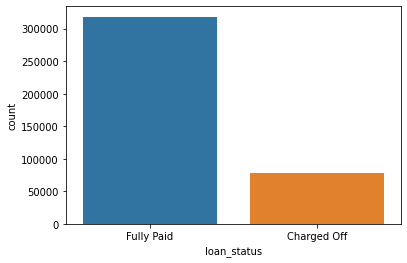

In [6]:
# To check the imbalance situation of classes, countplot is very accurate and easy option to use.

sns.countplot(x='loan_status',data=loan_df)

Now, several different visualization tools can be used to understand the data clearly. Understanding the data is one of the key points of any project. 

(0.0, 45000.0)

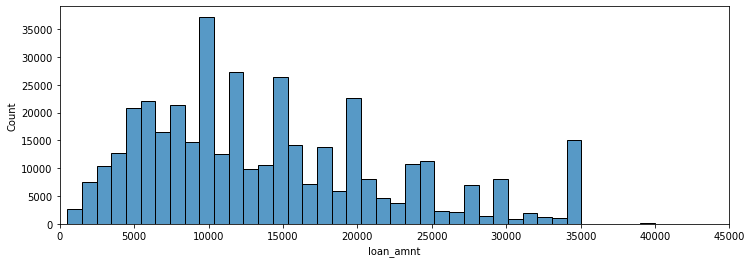

In [7]:
# To see the distribution of the amount of the loans, histograms can be used.

plt.figure(figsize=(12,4))
sns.histplot(loan_df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

Further investigation of understanding data can be examined with correlation matrix. Relations among the features can be seen precisely by using correlation matrix. More fancy visualization of correlation matrix can be gotten with heatmaps.

In [8]:
# To get basic correlation matrix

loan_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

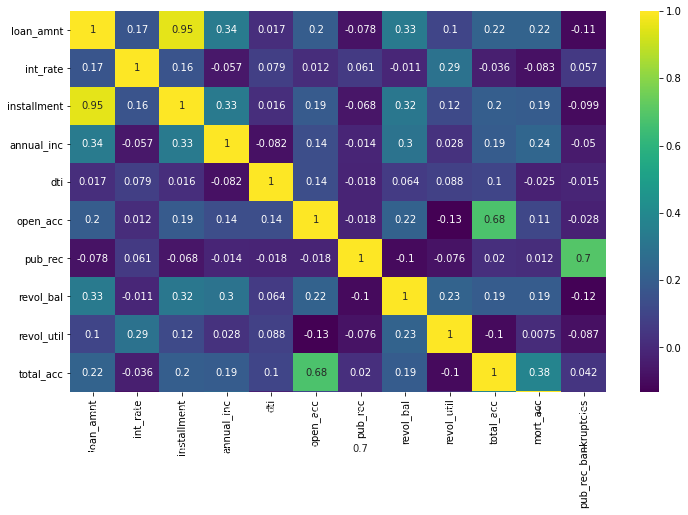

In [9]:
# To get better visualized correlation matrix

plt.figure(figsize=(12,7))
sns.heatmap(loan_df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

The correletaion between the loan amount and installment is nearly perfect. This creates suspicion and needs a further investigation. The created fancy function, feat_info(), can be used to compare the descriptions of features and after that, visual investigation can be handled by scatterplot. 

In [10]:
feat_info('installment')


The monthly payment owed by the borrower if the loan originates.


In [11]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

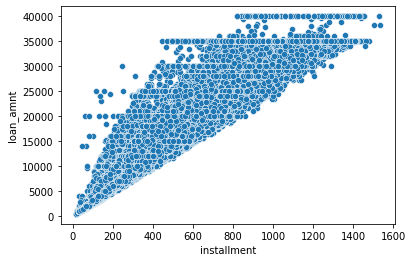

In [12]:
sns.scatterplot(x='installment', y='loan_amnt', data=loan_df)

It looks like the correlation between loan amount and installment is normal.

It is always good idea to examine basic statistics about the target feature. Describe method can be used directly. Another nicer and more visual option to see the mean is using boxplot.

In [13]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

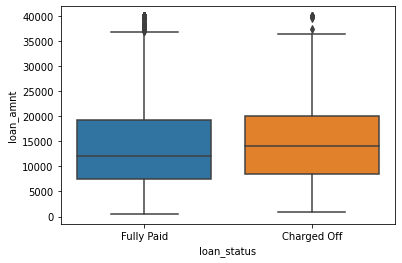

In [14]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)

Grade and SubGrade features are another important features that are worth to go into visual examination.


In [15]:
print(sorted(loan_df['grade'].unique()))
print(sorted(loan_df['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

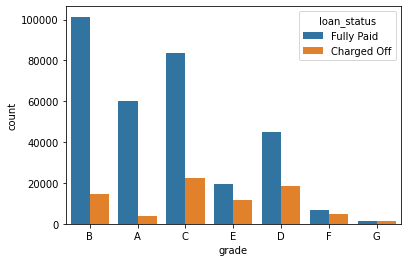

In [16]:
sns.countplot(x= 'grade', hue='loan_status' ,data=loan_df)

As one can see from the countplot, there is a ordering issue. In order to solve that issue, one can sort the relavent feature and used that sorted version to create ordered plots

<AxesSubplot:xlabel='grade', ylabel='count'>

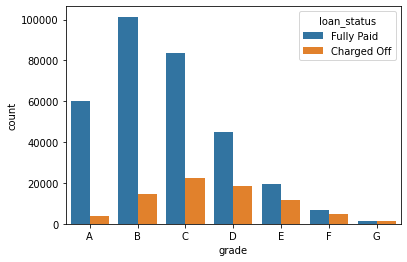

In [17]:
grade_order = sorted(loan_df['grade'].unique())
sns.countplot(x= 'grade', hue='loan_status' ,order = grade_order, data=loan_df)

It can be seen that, lower grades tend to not paid loan fully. On the other hand, higher grades have high incidence of fully paid. Let's continue with the amount of subgrades among the grades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

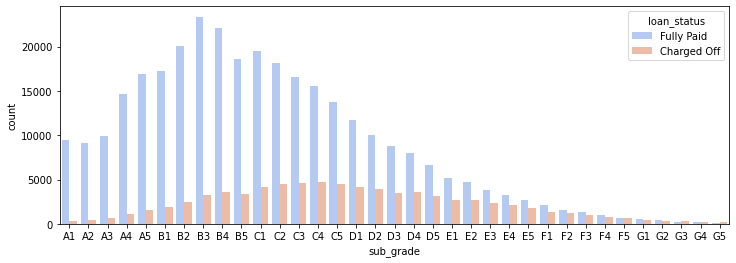

In [18]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(loan_df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loan_df,hue='loan_status',order = subgrade_order,palette='coolwarm' )

Let's take a closer look to two lowest grades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

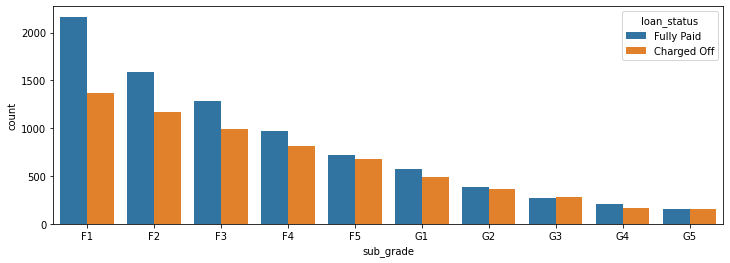

In [19]:
f_and_g = loan_df[(loan_df['grade']=='G') | (loan_df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order_f_g = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order_f_g,hue='loan_status')

### Encoding the Target Feature

Encoding the string values in loan_status is examined.Machine learning algorithms and related with that classification of loan status can be worked better with numbers. To provide only the numbers, encoding can be applied.

In [20]:
loan_df['loan_status'].unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [21]:
# Creating new column to store the numerical encoded versions of loan status

loan_df['loan_repaid'] = loan_df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
loan_df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

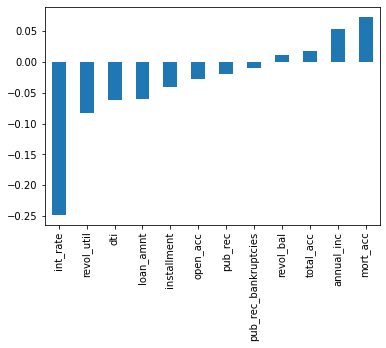

In [22]:
# Creating a plot to show the correletion of original numerical features with new feature

loan_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## 3. Data Wrangling

### Checking the Missing Values

Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

In [23]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

MAybe, getting the percentage of missing data could be more helpful to understand importance of missing feature.

In [24]:
(loan_df.isnull().sum() / len(loan_df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Examining the Importance of Missing Values

Now one needs to go into details of features (with or without missing values) and get a final and partially subjective decision about the importance of features. Of course, starting with features with missing values could be clever choice.

In [25]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [26]:
loan_df['emp_title'].nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [27]:
loan_df = loan_df.drop('emp_title',axis=1)

In [28]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
loan_df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [30]:
sorted(loan_df['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

One can notice that built-in sorted methods will not give proper result for this specific case. It will be convenient to sort manually and show the sorted valued plot. Since classification task is held, plot should distinguish the loan status.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

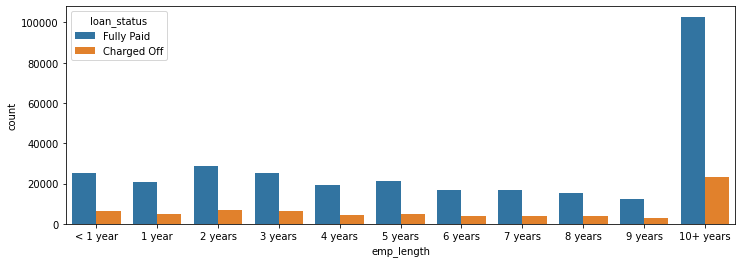

In [31]:
sorted_emp_length =  [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=loan_df, hue='loan_status', order=sorted_emp_length)

This level of visualization isn't really informative, if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 

In [32]:
# Counting the charged off employee for each group.

emp_co = loan_df[loan_df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [33]:
# Counting the fully paid employee for each group.

emp_fp = loan_df[loan_df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='emp_length'>

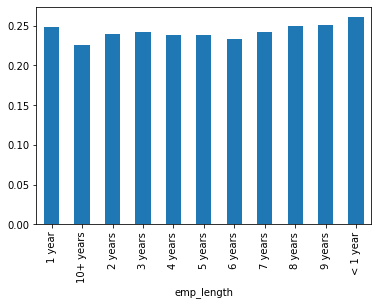

In [34]:
emp_len_co_fp_ratio = emp_co/emp_fp
emp_len_co_fp_ratio.plot(kind='bar')

Now, the final decision about this feature can be made. It is not useful to keep because there are no strong relation between the loan status and employment length. Feature will be dropped.

In [35]:
loan_df = loan_df.drop('emp_length', axis=1)

Let's take a look at the description of title and investigate the possibly similar features.

In [36]:
feat_info('title')

The loan title provided by the borrower


In [37]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


Purpose and title looks similar and one can prove that point by looking the data.

In [38]:
loan_df['title'].head(15)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
Name: title, dtype: object

In [39]:
loan_df['purpose'].head(15)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
Name: purpose, dtype: object

They are exactly same feature so title can be dropped freely.

In [40]:
loan_df = loan_df.drop('title', axis=1)

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns.

In [41]:
loan_df = loan_df.drop('revol_util', axis=1)

In [42]:
loan_df = loan_df.drop('pub_rec_bankruptcies', axis=1)

The higher missing value percentage is remained as final part of dealing with missing data. First take a look at the basic properties of mort_acc feature

In [43]:
# Description of mort_acc feature

feat_info('mort_acc')

Number of mortgage accounts.


In [44]:
# To check the total number of mortgage account in the each unique values

loan_df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

There are always more than one concrete way to deal with missing data. For this specific case, missing values could be replaced by the mean of feature that has the highest correlation with mortgage account.

In [45]:
# To check the correlation in descending order

loan_df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc       1.000000
total_acc      0.381072
annual_inc     0.236320
loan_amnt      0.222315
revol_bal      0.194925
installment    0.193694
open_acc       0.109205
loan_repaid    0.073111
pub_rec        0.011552
dti           -0.025439
int_rate      -0.082583
Name: mort_acc, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value. This involves using an .apply() method with two columns.

In [46]:
# First get the mean of total_acc

total_acc_mean = loan_df.groupby('total_acc').mean()['mort_acc']
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [47]:
# Basic function to be used for .apply() method

def replace_missing_with_mean(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [48]:
loan_df['mort_acc'] = loan_df.apply(lambda x: replace_missing_with_mean(x['total_acc'],x['mort_acc']), axis=1)

In [49]:
# Final check to be sure about all the missing values are handled

loan_df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

### Encoding the Categorical Columns

All the numerical columns are ready for classification task, but still encoding of categorical columns should be accomplish. .map(), .get_dummies() and .apply() methods will be used to perform encoding. 

In [50]:
# To check all categorical columns

loan_df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's start with the term column. It is good idea to  check value counts of each categoraical columns. 

In [51]:
loan_df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [52]:
loan_df['term'] = loan_df['term'].map({' 36 months':36, ' 60 months':60})
loan_df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [53]:
loan_df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [54]:
loan_df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

One can notice that grade feature can be dropped because sub_grade feature will provide necessary information that grade can ever give.

Only sub_grade feature will be encoded.

In [55]:
loan_df = loan_df.drop('grade',axis=1)

In [56]:
# Creating the dummies, drop_first will drop the first sub_group (in this case A1)

subgrade_dummies = pd.get_dummies(loan_df['sub_grade'],drop_first=True)
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Dropping original sub_grade column and concatenate 

loan_df = pd.concat([loan_df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
loan_df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# To check all categorical columns

loan_df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [59]:
loan_df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [60]:
loan_df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [61]:
loan_df['issue_d'].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [62]:
loan_df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [63]:
loan_df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [64]:
loan_df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Oct-1961       1
Jul-1962       1
Nov-1957       1
Sep-1961       1
Dec-1951       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [65]:
loan_df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [66]:
loan_df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [67]:
loan_df['address'].value_counts()

USNS Johnson\nFPO AE 05113                                8
USS Johnson\nFPO AE 48052                                 8
USCGC Smith\nFPO AE 70466                                 8
USS Smith\nFPO AP 70466                                   8
USNS Johnson\nFPO AP 48052                                7
                                                         ..
297 Angela Port Suite 140\nSouth Daniel, DE 05113         1
47014 Jones Mountain\nDerrickmouth, VT 48052              1
551 Eileen Alley\nEstradaburgh, TX 00813                  1
8955 Mark Fort\nJohnsonshire, WI 22690                    1
6561 Barnett Stravenue Apt. 578\nAlexisshire, UT 30723    1
Name: address, Length: 393700, dtype: int64

From the examination of features, one can decide that verification_status, purpose, initial_list_status and application_type can be directly convert into dummies. Other features may require additional steps to explore better insights.

In [68]:
group_of_dummies = pd.get_dummies(loan_df[['verification_status', 'purpose', 'initial_list_status', 'application_type']],drop_first=True)
group_of_dummies

,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
396026,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
396027,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
396028,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [69]:
# To drop the original features and concatenate with dummies 

loan_df = pd.concat([loan_df.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type'],axis=1),group_of_dummies],axis=1)
loan_df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,1,0


In [70]:
# To check all categorical columns

loan_df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

For home_ownership, NONE and ANY categories have extremely small number of data with respect to other categories. Thus, NONE and ANY can be replaced by OTHER.

In [71]:
# Replace the categories, drop the original feature column and concatenate the dummies and dataset

loan_df['home_ownership'] = loan_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

home_dummies = pd.get_dummies(loan_df['home_ownership'],drop_first=True)
loan_df = pd.concat([loan_df.drop('home_ownership',axis=1),home_dummies],axis=1)
loan_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,1,0,1,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,1,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,1,0,0,0,0


Since classfier tries to predict the loan status, one wouldn't know beforehand whether or not a loan would be issued when using the model, so in theory issue date should not exist, drop issue_d feature.

In [72]:
loan_df = loan_df.drop('issue_d', axis=1)

Since loan status is encoded already, one can drop loan_status feature.

In [73]:
loan_df = loan_df.drop('loan_status', axis=1)

earliest_cr_line is a historical time stamp feature. In order to have more tight and neat categorical columns, one can only consider the yearly time stamps instead of monthly time stamps.

In [74]:
# To select only the year portion of data

loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))
loan_df = loan_df.drop('earliest_cr_line', axis = 1)

Last but not least categorical feature to be dealed with is address. Intuitively, one can notice that all address information is long and useless to feed the model. One can try to extract some useful information with zip codes.

In [75]:
# To select only the zip code portion of data

loan_df['zip_code'] = loan_df['address'].apply(lambda x:x[-5:])

In [76]:
# To check the total number of occurance of each zip code

loan_df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [77]:
# Create dummies, drop the original feature column and concatenate the dummies and dataset

zip_code_dummies = pd.get_dummies(loan_df['zip_code'],drop_first=True)
loan_df = pd.concat([loan_df.drop(['zip_code','address'],axis=1),zip_code_dummies],axis=1)
loan_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,...,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,25.0,...,1990,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,27.0,...,2004,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,26.0,...,2007,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,13.0,...,2006,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,43.0,...,1999,0,1,0,0,0,0,0,0,0


In [78]:
# Final check to be sure about converting all categorical features to numeric representations

loan_df.select_dtypes(['object']).columns

Index([], dtype='object')

## 4. Classification of Loan Status

### Splitting Train and Test Sets

Importing the necessary modules for building and evaluating classifier model.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report,confusion_matrix

In [80]:
# Split features will be used for prediction(X) and class label(loan status, y) for the train and test sets

X = loan_df.drop('loan_repaid', axis=1).values
y = loan_df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalization of Data

Normalizing the data of X_train and of X_test with min-max scale. Then shuffling the data of X_train and y_train will be applied in order to improve generalize capabilities

In [81]:
# Applying the MinMaxScaler for the normalization step

scaler = MinMaxScaler()

# Normalizing data

X_train = scaler.fit_transform(X_train)

# Shuffling train dataset

X_train, y_train = shuffle(X_train, y_train) 

# Normalizing data

X_test = scaler.transform(X_test)

# Printing the resulted shapes 

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (316824, 76)
y_train shape:  (316824,)
X_test shape:  (79206, 76)
y_test shape:  (79206,)


### Creating the Model

In [82]:
# Create a neural network model using Tensorflow 

# Defining the neural network model and their activation function 
# Using Dropout, which means that each single data point is used alone for a random subset of neurons. 
# Dropout is applied to make the neural network more robust and increase generalization capabilities.

# Sequential model is used individually in case of modifying the model easily

model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with Adam Optimizer and Binary Cross Entropy loss function

model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
# Performing the training step 

model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.3002 - val_loss: 0.2620
Epoch 2/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2668 - val_loss: 0.2599
Epoch 3/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2638 - val_loss: 0.2596
Epoch 4/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2625 - val_loss: 0.2591
Epoch 5/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2617 - val_loss: 0.2594
Epoch 6/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2613 - val_loss: 0.2590
Epoch 7/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2609 - val_loss: 0.2589
Epoch 8/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2607 - val_loss: 0.2588
Epoch 9/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.2602 - val_loss: 0.2586
Epoch 10/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.260

In [84]:
# Saving the model

model.save('loan_status_classifier.h5')

### Evaluating the Model Performance

In [85]:
# Getting the record of the loss values and metric values during training

loss = pd.DataFrame(model.history.history)

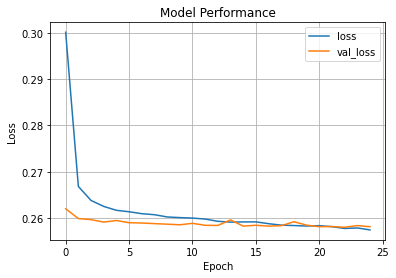

In [86]:
# Plot the training and validation losses related with number of epochs 

loss[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Performance")
plt.grid(True)

In [87]:
# Creating the predictions from the X_test set and display a classification report and confusion matrix for the X_test set

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206

[[ 6983  8510]
 [  287 63426]]


### Test the Classifier

In [88]:
# In order to perform more robust testing, new customer is selected randomly

import random
random.seed(101)
random_index = random.randint(0,len(loan_df))

random_customer = loan_df.drop('loan_repaid',axis=1).iloc[random_index]
random_customer

loan_amnt      24000.00
term              60.00
int_rate          13.11
installment      547.43
annual_inc     85000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 304691, Length: 76, dtype: float64

In [89]:
# Predicting the loan status of randomly selected customer, where Fully Paid is encoded as 1, Charged Off is represented by 0

model.predict_classes(scaler.transform(random_customer.values.reshape(1,-1))) 

array([[1]], dtype=int32)

In [90]:
# To check the original loan status from dataset

loan_df.iloc[random_index]['loan_repaid']

1.0